## Notebook setup

In [ ]:
import os
import io
import warnings
import datetime
import numpy as np
import base64
import pytz
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

# import sys
# sys.path.append('../../')

from openbb_terminal.api import widgets
from openbb_terminal.api import helper
from openbb_terminal.api import openbb
from openbb_terminal.api import Portfolio
from openbb_terminal.helper_classes import TerminalStyle

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

# Detect if prediction capabilities are present. If they are not, disable prediction in the rest of the script
# so that the report can still be generated without prediction results.
# predictions = True
# try:
#     openbb.stocks.pred.models
# except Exception as e:
#     predictions = False

# TODO Fix predictions virtual path on api refactored

predictions = False

### Header

In [ ]:
try:
    theme = TerminalStyle("dark", "dark", "dark")
except:
    pass
stylesheet = widgets.html_report_stylesheet()
with open("OpenBB_reports_logo.png", "rb") as image_file:
    openbb_image_encoded = base64.b64encode(image_file.read())

user_time_zone = pytz.timezone(helper.get_user_timezone())

In [ ]:
# Parameters that will be replaced when calling this notebook
symbol = ""
report_name = "portfolio_report"

In [ ]:
author = "Diogo Sousa"
report_title = f"Portfolio report"
report_date = pd.Timestamp.now(tz=user_time_zone).strftime("%d %B, %Y")
report_time = pd.Timestamp.now(tz=user_time_zone).strftime("%H:%M")
report_timezone = pd.Timestamp.now(tz=user_time_zone).tzinfo
report_title, report_date, report_time, report_timezone

## Data

Loading

In [ ]:
transactions = Portfolio.read_orderbook("..\\..\\portfolio\\holdings\\example.csv")

P = Portfolio(transactions)
P.generate_portfolio_data()
P.load_benchmark()
P.get_orderbook()

In [ ]:
openbb.portfolio.holdv(P, chart=True)

In [ ]:
openbb.portfolio.perf(P)

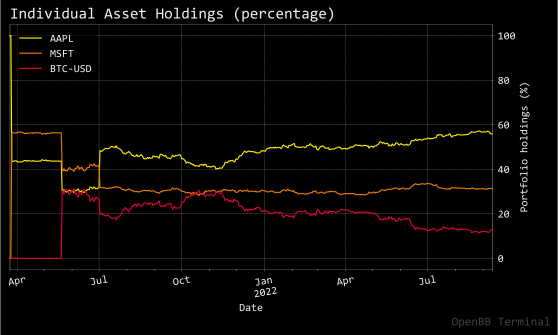

In [9]:
openbb.portfolio.holdp(P, chart=True)